index:190098M
<br>
Name:Chamara R.P.O.
<br>
Github Link: https://github.com/oshan1998/EN2550_Assignments


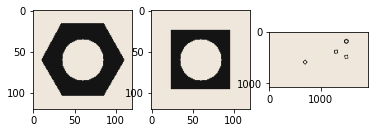

In [44]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()


Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images

Text(0.5, 1.0, 'threshold :20')

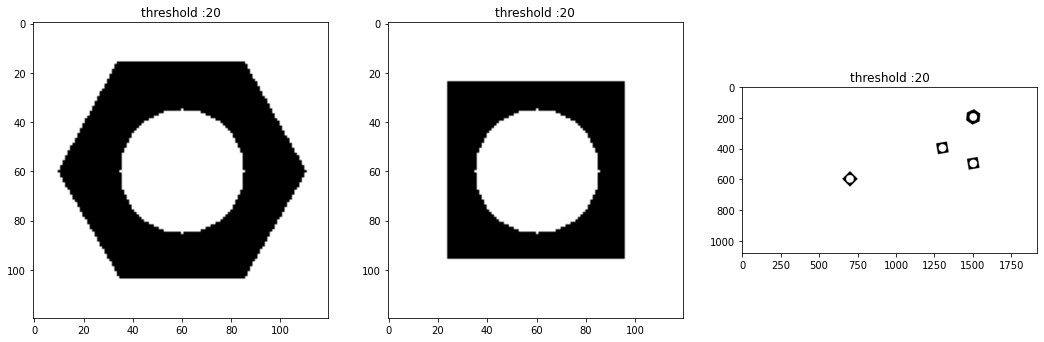

In [45]:
fig, ax = plt. subplots(1,3,figsize=(18,6))
hexnut_template = cv.cvtColor(hexnut_template,cv.COLOR_BGR2GRAY)
squarenut_template = cv.cvtColor(squarenut_template,cv.COLOR_BGR2GRAY)
conveyor_f100 = cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)
ret1,hexnut = cv.threshold(hexnut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret2,square = cv.threshold(squarenut_template,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ret3,conveyor = cv.threshold(conveyor_f100,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
ax[0].imshow(hexnut,cmap='gray', vmin=0, vmax=255)
ax[0].set_title("threshold :%i"%ret1)
ax[1].imshow(square,cmap='gray', vmin=0, vmax=255)
ax[1].set_title("threshold :%i"%ret2)
ax[2].imshow(conveyor,cmap='gray', vmin=0, vmax=255)
ax[2].set_title("threshold :%i"%ret3)



Carry out morphological closing to remove small holes inside the foreground. Use a 3×3 kernel.

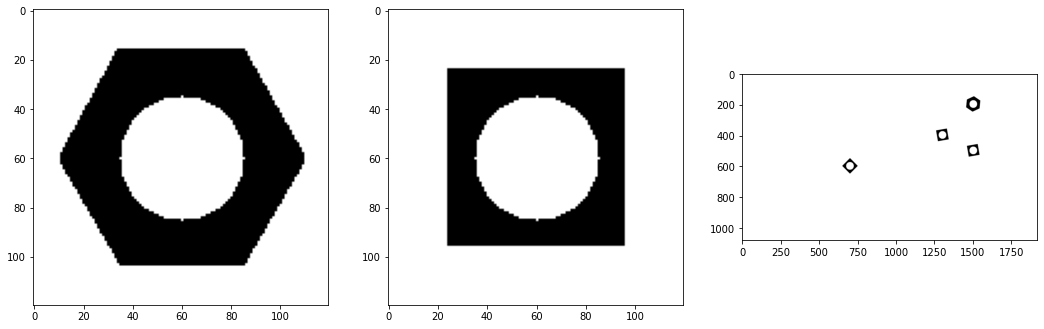

In [7]:
kernel = np.ones((3,3),np.uint8)
conveyor_closing = cv.morphologyEx(conveyor, cv.MORPH_CLOSE, kernel)
hexnut_closing = cv.morphologyEx(hexnut, cv.MORPH_CLOSE, kernel)
square_closing = cv.morphologyEx(square, cv.MORPH_CLOSE, kernel)
fig, ax = plt. subplots(1,3,figsize=(18,6))
ax[0].imshow(hexnut_closing,cmap='gray', vmin=0, vmax=255)
ax[1].imshow(square_closing,cmap='gray', vmin=0, vmax=255)
ax[2].imshow(conveyor_closing,cmap='gray', vmin=0, vmax=255)


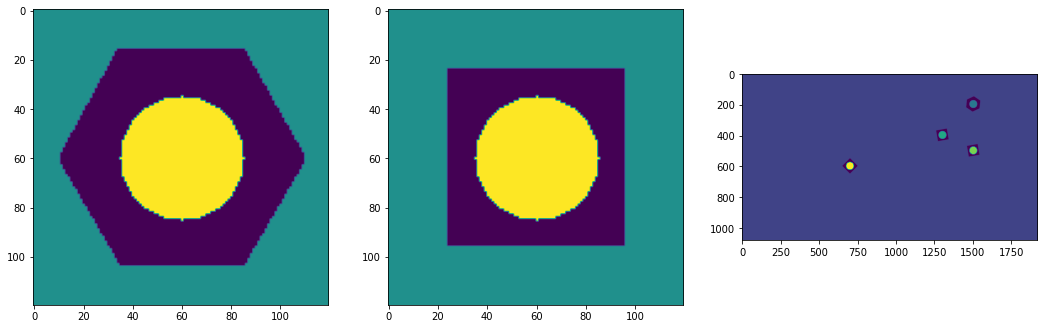

In [8]:
hexnut_output = cv.connectedComponentsWithStats(hexnut_closing, cv.CV_32S ,connectivity=8)
square_output = cv.connectedComponentsWithStats(square_closing, cv.CV_32S ,connectivity=8)
conveyor_output = cv.connectedComponentsWithStats(conveyor_closing, cv.CV_32S ,connectivity=8)
(hexnut_numLabels, hexnut_labels, hexnut_stats, hexnut_centroids) = hexnut_output
(square_numLabels, square_labels,square_stats, square_centroids) = square_output
(conveyor_numLabels, conveyor_labels, conveyor_stats, conveyor_centroids) = conveyor_output
fig, ax = plt. subplots(1,3,figsize=(18,6))
ax[0].imshow(hexnut_labels)
ax[1].imshow(square_labels)
ax[2].imshow(conveyor_labels)

In [9]:
print("number of components in the image hex nut ",hexnut_numLabels)
for i in range(hexnut_numLabels):
	x = hexnut_stats[i, cv.CC_STAT_LEFT]
	y = hexnut_stats[i, cv.CC_STAT_TOP]
	w = hexnut_stats[i, cv.CC_STAT_WIDTH]
	h = hexnut_stats[i, cv.CC_STAT_HEIGHT]
	area = hexnut_stats[i, cv.CC_STAT_AREA]
	(cX, cY) = hexnut_centroids[i]
	print("starting x cordinate of component",i+1,x)
	print("starting y cordinate of component",i+1,y)
	print("width of component",i+1,w)
	print("height of component",i+1,h)
	print("area of component",i+1,area)
	print("cordinates of centroid",i+1,(cX,cY))
print("number of components in the image square nut ",square_numLabels)
for i in range(square_numLabels):
	x = square_stats[i, cv.CC_STAT_LEFT]
	y = square_stats[i, cv.CC_STAT_TOP]
	w = square_stats[i, cv.CC_STAT_WIDTH]
	h = square_stats[i, cv.CC_STAT_HEIGHT]
	area = square_stats[i, cv.CC_STAT_AREA]
	(cX, cY) = square_centroids[i]
	print("starting x cordinate of component",i+1,x)
	print("starting y cordinate of component",i+1,y)
	print("width of component",i+1,w)
	print("height of component",i+1,h)
	print("area of component",i+1,area)
	print("cordinates of centroid",i+1,(cX,cY))
print("number of components in the image conveyor ",conveyor_numLabels)
for i in range(conveyor_numLabels):
	x = conveyor_stats[i, cv.CC_STAT_LEFT]
	y = conveyor_stats[i, cv.CC_STAT_TOP]
	w = conveyor_stats[i, cv.CC_STAT_WIDTH]
	h = conveyor_stats[i, cv.CC_STAT_HEIGHT]
	area = conveyor_stats[i, cv.CC_STAT_AREA]
	(cX, cY) = conveyor_centroids[i]
	print("starting x cordinate of component",i+1,x)
	print("starting y cordinate of component",i+1,y)
	print("width of component",i+1,w)
	print("height of component",i+1,h)
	print("area of component",i+1,area)
	print("cordinates of centroid",i+1,(cX,cY))
	

number of components in the image hex nut  3
starting x cordinate of component 1 11
starting y cordinate of component 1 16
width of component 1 99
height of component 1 88
area of component 1 4722
cordinates of centroid 1 (59.83354510800508, 59.22257518000847)
starting x cordinate of component 2 0
starting y cordinate of component 2 0
width of component 2 120
height of component 2 120
area of component 2 7717
cordinates of centroid 2 (59.168847997926655, 59.54269793961384)
starting x cordinate of component 3 35
starting y cordinate of component 3 35
width of component 3 51
height of component 3 51
area of component 3 1961
cordinates of centroid 3 (60.0, 60.0)
number of components in the image square nut  3
starting x cordinate of component 1 24
starting y cordinate of component 1 24
width of component 1 72
height of component 1 72
area of component 1 3223
cordinates of centroid 1 (59.19578032888613, 59.19578032888613)
starting x cordinate of component 2 0
starting y cordinate of compon

How many connected components are detected in each image?
<br>
Hex nut -> 3
<br>
square nut -> 3
<br>
conveyor -> 6
<br>
What are the statistics? Interpret these statistics.
<br>
these statistic includes,
<br>
1)Starting x cordinates of the components
<br>
2)Starting y cordinates of the components
<br>
3)The width of the components
<br>
4)The height of the components
<br>
5)area of the components
<br>

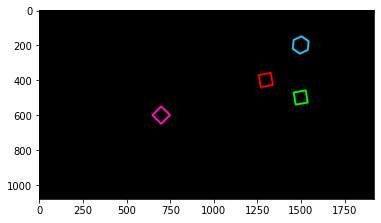

In [14]:
import matplotlib.pyplot as plt
conveyor = cv.imread("conveyor_f100.png",cv.IMREAD_COLOR)
conveyor_gray = cv.cvtColor(conveyor,cv.COLOR_BGR2GRAY)
transform = np.arange(255,-1,-1).astype('uint8')
conveyor_inv = cv.LUT(conveyor_gray,transform)
ret, conveyor_thresh = cv.threshold(conveyor_inv,0,255,cv.THRESH_OTSU)
conveyor_contours, conveyor_hierarchy = cv.findContours(conveyor_thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

output = np.zeros((conveyor.shape[0],conveyor.shape[1],3),np.uint8)
cv.drawContours(output, conveyor_contours,0, (178,22,245), 10)
cv.drawContours(output, conveyor_contours,2, (0,255,0), 10)
cv.drawContours(output, conveyor_contours,4, (0,0,255), 10)
cv.drawContours(output, conveyor_contours,6, (245,195,45), 10)
plt.imshow(cv.cvtColor(output, cv.COLOR_RGB2BGR))


In [2]:
import cv2 as cv
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [2]:
import cv2 as cv
hex_nut = cv.imread("hexnut_template.png",cv.IMREAD_GRAYSCALE)
transform = np.arange(255,-1,-1).astype('uint8')
hex_nut_inv = cv.LUT(hex_nut,transform)
ret, hexnut_thresh = cv.threshold(hex_nut_inv,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
hexnut_contours, hexnut_hierarchy = cv.findContours(hexnut_thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

conveyor = cv.imread("conveyor_f100.png",cv.IMREAD_GRAYSCALE)
transform = np.arange(255,-1,-1).astype('uint8')
conveyor_inv = cv.LUT(conveyor,transform)
ret, conveyor_thresh = cv.threshold(conveyor_inv,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
conveyor_contours, conveyor_hierarchy = cv.findContours(conveyor_thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

sep_threshold =0.01 
count = 0
for i in range(0,len(conveyor_contours)-1):
    if i%2==0:
        ret = cv.matchShapes(hexnut_contours[0],conveyor_contours[i],1,0.0)
        if ret<=sep_threshold:
            count+=1
print("Number of hexnuts = ",count)

Number of hexnuts =  1


In [3]:

import cv2 as cv
import numpy as np
square_nut = cv.imread("squarenut_template.png",cv.IMREAD_GRAYSCALE)
transform = np.arange(255,-1,-1).astype('uint8')
square_nut_inv = cv.LUT(square_nut,transform)
ret, squarenut_thresh = cv.threshold(square_nut_inv,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
squarenut_contours, squarenut_hierarchy = cv.findContours(squarenut_thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

def frame_contour_generator(frame):
    gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    transform = np.arange(255,-1,-1).astype('uint8')
    inv_frame = cv.LUT(gray_frame,transform)
    ret, thresh_frame = cv.threshold(inv_frame, 0, 255, cv.THRESH_OTSU)
    contours_frame, hierarchy = cv.findContours(thresh_frame, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    return contours_frame

frame_array = []

cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []
total_obj = 0
while cap.isOpened():
    obj_count = 0
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    contours = frame_contour_generator(frame)
    for i in range(0,len(contours)):
        ret_square = cv.matchShapes(squarenut_contours[0],contours[i],1,0.0)
        ret_hexnut = cv.matchShapes(hexnut_contours[0],contours[i],1,0.0)
        if (ret_square<=0.01 or ret_hexnut<=0.01) and ((cv.contourArea(contours[i])<5100 and
                                                 cv.contourArea(contours[i])>4900) or (cv.contourArea(contours[i])<6550 
                                                                                       and cv.contourArea(contours[i])>6350) ):
            obj_count+=1
            M = cv.moments(contours[i])
            cx = int(M['m10']/M['m00'])
            if 1000<=cx and cx<=1009:
                total_obj+=1
        
    
    
    f += 1
    text = 'Frame:' + str(f) + "  Obj :" + str(obj_count) + "  Total Obj :" + str(total_obj)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 2, cv.LINE_AA)
    # frame = cv.resize(frame, (1080, 540)) # Resize image 
    frame_array.append(frame)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()


#Writing the video


shape = (1080, 1920, 3)

# Your code here


out = cv.VideoWriter('./conveyor_result_190098M.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.
